In [1]:
# Imported required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Loaded the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Displayed sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generated summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Extracted numeric columns
numeric_columns = market_data_df.select_dtypes(include=['float64', 'int64']).columns

In [5]:
# Used the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df[numeric_columns])

In [6]:
# Displayed column names for better context
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [7]:
# Created a DataFrame with the scaled data
# Copied the crypto names from the original data
# Set the coinid column as index, ('coin_id' column already set as index)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns, index=market_data_df.index)

# Displayed sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Created a list with the number of k-values to try
# Used a range from 1 to 11
k_values = range(1, 11)

# Created an empty list to store the inertia values
inertia_values = []

# Created a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Created a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
# 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
# 3. Appended the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Created a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Created a DataFrame with the data to plot the Elbow curve, round to 2 decimal places
elbow_df = (pd.DataFrame(elbow_data)).round(2)

# Displayed the DataFrame
elbow_df.head(10)

c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `

,k_values,inertia_values
0,1,287.00
1,2,195.82
2,3,123.19
3,4,79.02
4,5,64.13
5,6,52.10
6,7,43.89
7,8,37.18
8,9,32.30
9,10,28.52


<Axes: xlabel='k_values'>

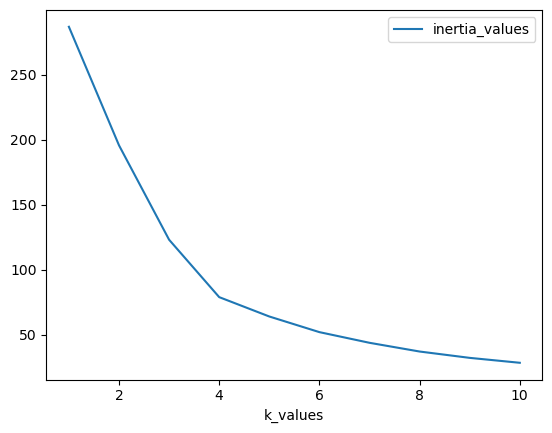

In [9]:
# Plotted a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k_values', y='inertia_values', linestyle='-')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value visually is k=4, visually has the hardest elbow.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialized the K-Means model with k=4 (I chose k=4 as the best choice visually based on the elbow method)
kmeans = KMeans(n_clusters=4)

In [11]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)

# Viewed the resulting array of cluster values.
clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [13]:
# Created a copy of the DataFrame
scaled_df_copy = scaled_df.copy()

In [14]:
# Added a new column to the DataFrame with the predicted clusters
scaled_df['predicted_cluster'] = clusters

# Displayed sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [15]:
# Displayed columns for better context
scaled_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'predicted_cluster'],
      dtype='object')

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

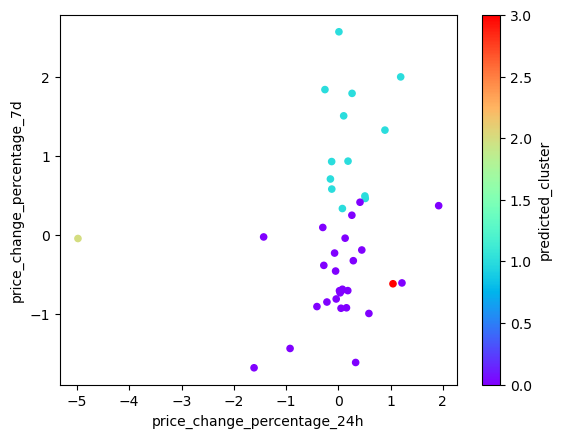

In [16]:
# Created a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Used "rainbow" for the color to better visualize the data.
scaled_df.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='predicted_cluster', colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Created a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [18]:
# Used the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_result = pca_model.fit_transform(scaled_df)

# Converted the result to a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Viewed the first five rows of the DataFrame. 
pca_df.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,0.102716,-1.092940,0.535184
ethereum,0.076712,-0.704779,1.036855
tether,-0.619999,-0.019769,-0.654034
ripple,-0.664725,0.002174,-0.485221
bitcoin-cash,0.288739,-2.437009,1.799157


In [19]:
# Retrieved the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

explained_variance

array([0.38043081, 0.33516548, 0.17629339])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Please refer to the following cell output for result answer.

In [20]:
# Calculated the total explained variance
total_variance = sum(explained_variance)

# Printed the total explained variance
print(f"Total Explained Variance of the three principal components: {total_variance:.2%}")

Total Explained Variance of the three principal components: 89.19%


In [21]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
pca_df_new = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Copy the crypto names from the original data
pca_df_new['coin_id'] = market_data_df.index.tolist()

# Set the coinid column as index
pca_df_new.set_index('coin_id', inplace=True)

# Display 10 rows of the sample data
pca_df_new.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,0.102716,-1.092940,0.535184
ethereum,0.076712,-0.704779,1.036855
tether,-0.619999,-0.019769,-0.654034
ripple,-0.664725,0.002174,-0.485221
bitcoin-cash,0.288739,-2.437009,1.799157
binancecoin,0.442508,-1.522540,0.787047
chainlink,0.238781,-0.800393,2.850100
cardano,0.330962,-0.891921,1.500843
litecoin,-0.117287,-0.771353,0.720113


### Find the Best Value for k Using the PCA Data

In [22]:
# Created a list with the number of k-values to try
# Used a range from 1 to 11
k_values_pca = range(1, 11)

# Created an empty list to store the inertia values
inertia_values_pca = []

# Created a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values_pca:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
# 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_df)
# 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)


# Created a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k_values_pca': k_values_pca, 'inertia_values_pca': inertia_values_pca}

# Created a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)

# Displayed the DataFrame
elbow_pca_df

c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,k_values_pca,inertia_values_pca
0,1,272.113366
1,2,176.265015
2,3,99.671696
3,4,47.229370
4,5,36.208410
5,6,26.319251
6,7,20.696280
7,8,16.619383
8,9,13.394051
9,10,10.218460


<Axes: xlabel='k_values_pca'>

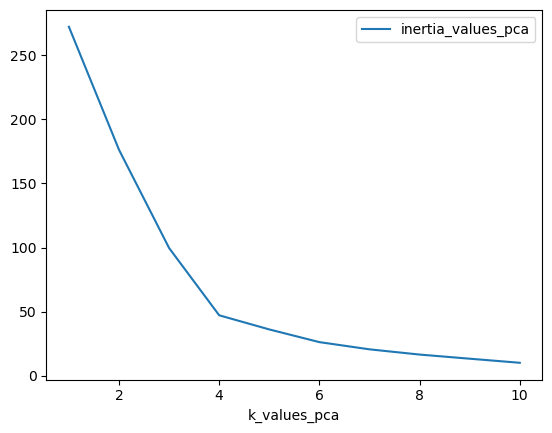

In [23]:
# Plotted a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.plot(x='k_values_pca', y='inertia_values_pca', linestyle='-')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based off of the elbow curve, the best k value is, k=4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, I designated k=4 using the original data, but the elbow is better defined in the PCA plot.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [24]:
# Initialized the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

In [25]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df_new)

c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [26]:
# Predicted the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans.predict(pca_df_new)

# Printed the resulting array of cluster values.
clusters_pca

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0])

In [27]:
# Created a copy of the DataFrame with the PCA data
pca_df_new_copy = pca_df_new.copy()

# Added a new column to the DataFrame with the predicted clusters
pca_df_new_copy['predicted_cluster'] = clusters_pca

# Displayed sample data
pca_df_new_copy.head()

,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,0.102716,-1.092940,0.535184,3
ethereum,0.076712,-0.704779,1.036855,3
tether,-0.619999,-0.019769,-0.654034,0
ripple,-0.664725,0.002174,-0.485221,0
bitcoin-cash,0.288739,-2.437009,1.799157,3


In [28]:
# Imported hvplot, in order to display plot via hvPlot, per instructions
import hvplot.pandas

# Created a scatter plot using hvPlot
scatter_plot = pca_df_new_copy.hvplot.scatter(x='PC1', y='PC2', c='predicted_cluster', cmap='rainbow', title='Scatter Plot of PC1 vs PC2 with Predicted Clusters', xlabel='PC1', ylabel='PC2')

# Displayed the scatter hvPlot
scatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster)

<Axes: xlabel='PC1', ylabel='PC2'>

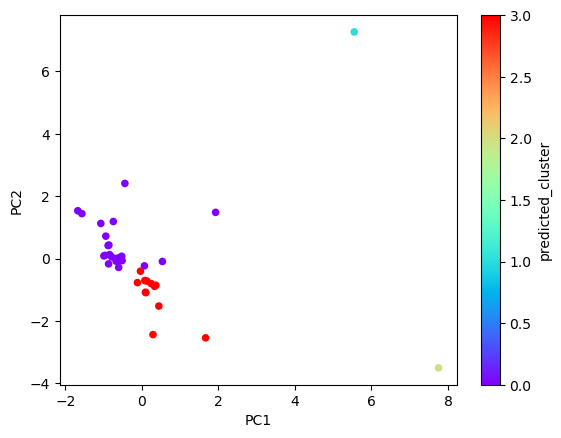

In [29]:
# Created a scatter plot using .plot() by setting `x="PC1"` and `y="PC2"` 
pca_df_new_copy.plot.scatter(x='PC1', y='PC2', c='predicted_cluster', colormap='rainbow')

### Determine the Weights of Each Feature on each Principal Component

In [30]:
# Used the columns from the original scaled DataFrame as the index.
# Accessed the components_ attribute of the fitted PCA model
components = pca_model.components_

# Created a DataFrame to store the weights of each feature on each principal component
weights_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=scaled_df.columns)

# Displayed the DataFrame
weights_df

,PC1,PC2,PC3
price_change_percentage_24h,-0.192092,-0.514407,-0.205206
price_change_percentage_7d,0.072440,-0.266523,0.740186
price_change_percentage_14d,0.263497,-0.474145,0.272906
price_change_percentage_30d,0.406141,-0.376988,-0.255916
price_change_percentage_60d,0.435498,-0.194903,-0.436904
price_change_percentage_200d,0.507446,0.280081,-0.023832
price_change_percentage_1y,0.415986,0.414305,0.164377
predicted_cluster,0.321352,-0.096629,0.227093


In [31]:
# Determined features with the strongest positive and negative influence on each principal component
for component in weights_df.columns:
    print(f"Principal Component: {component}")
    component_weights = weights_df[component].sort_values(ascending=False)
    strongest_positive = component_weights.head(1)  # Features with strongest positive influence
    strongest_negative = component_weights.tail(1)  # Features with strongest negative influence
    print("Strongest Positive Influence:")
    print(strongest_positive)
    print("\nStrongest Negative Influence:")
    print(strongest_negative)
    print("\n")

Principal Component: PC1
Strongest Positive Influence:
price_change_percentage_200d    0.507446
Name: PC1, dtype: float64

Strongest Negative Influence:
price_change_percentage_24h   -0.192092
Name: PC1, dtype: float64


Principal Component: PC2
Strongest Positive Influence:
price_change_percentage_1y    0.414305
Name: PC2, dtype: float64

Strongest Negative Influence:
price_change_percentage_24h   -0.514407
Name: PC2, dtype: float64


Principal Component: PC3
Strongest Positive Influence:
price_change_percentage_7d    0.740186
Name: PC3, dtype: float64

Strongest Negative Influence:
price_change_percentage_60d   -0.436904
Name: PC3, dtype: float64




#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Refer to above cell output for information on strongest positive/negative influences on each principle component.
    